Resultados del modelo SpaCy NER:
              precision    recall  f1-score  support
LOC            0.600000  0.652174  0.625000     23.0
MISC           0.750000  0.500000  0.600000      6.0
ORG            0.600000  0.214286  0.315789     14.0
PER            0.705882  0.666667  0.685714     18.0
micro avg      0.647059  0.540984  0.589286     61.0
macro avg      0.663971  0.508282  0.556626     61.0
weighted avg   0.645998  0.540984  0.569490     61.0


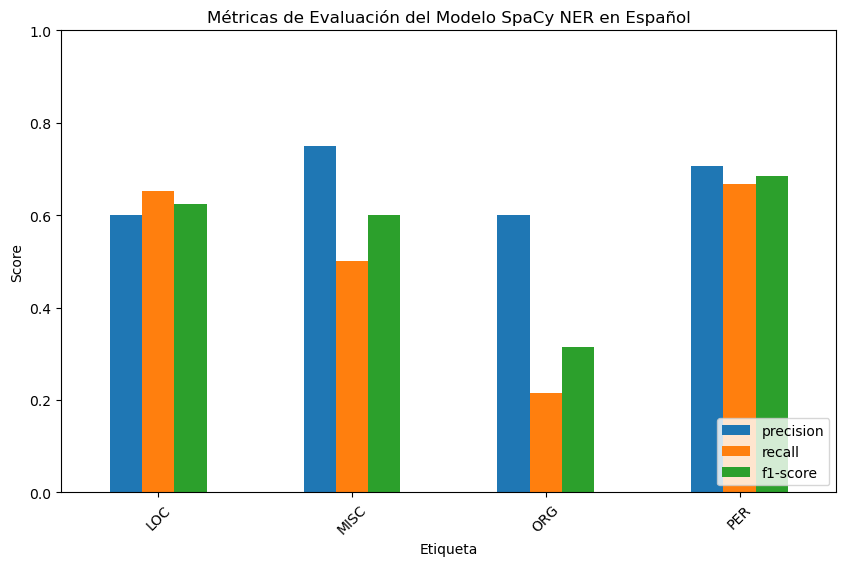

In [93]:
import json
import spacy
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el modelo de SpaCy para español
nlp = spacy.load("es_core_news_sm")

# Función para realizar el NER en un texto
def extract_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]
    return entities

# Ruta del archivo de validación
validation_file = "validation_set.json"  # Actualiza esta ruta según sea necesario

# Leer el archivo de validación
with open(validation_file, "r", encoding="utf-8") as file:
    validation_data = json.load(file)

# Diccionario para almacenar las entidades y las predicciones
true_labels = []
pred_labels = []
labels = ["LOC", "MISC", "ORG", "PER"]

# Evaluar cada documento
for record in validation_data:
    text = record["text"]
    true_entities = [(ent["text"], ent["label"], ent["start"], ent["end"]) for ent in record["entities"]]
    pred_entities = extract_ner(text)
    
    # Crear listas de etiquetas por cada entidad
    true_entities_dict = {(ent[2], ent[3]): ent[1] for ent in true_entities}
    pred_entities_dict = {(ent[2], ent[3]): ent[1] for ent in pred_entities}
    
    all_keys = set(true_entities_dict.keys()).union(set(pred_entities_dict.keys()))
    
    for key in all_keys:
        true_labels.append(true_entities_dict.get(key, 'O'))
        pred_labels.append(pred_entities_dict.get(key, 'O'))

# Calcular las métricas por cada etiqueta
report = classification_report(true_labels, pred_labels, labels=labels, output_dict=True)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(report).transpose()

# Mostrar el DataFrame
print("Resultados del modelo SpaCy NER:")
print(results_df)

# Generar gráfica
results_df.drop(columns=["support"]).iloc[:-3].plot(kind="bar", figsize=(10, 6))
plt.title("Métricas de Evaluación del Modelo SpaCy NER en Español")
plt.xlabel("Etiqueta")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()



2024-06-01 13:06:29,206 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Resultados del modelo Flair NER:
              precision    recall  f1-score  support
LOC            0.312500  0.217391  0.256410     23.0
MISC           0.000000  0.000000  0.000000      6.0
ORG            0.000000  0.000000  0.000000     14.0
PER            0.647059  0.611111  0.628571     18.0
micro avg      0.307692  0.262295  0.283186     61.0
macro avg      0.239890  0.207126  0.221245     61.0
weighted avg   0.308763  0.262295  0.282159     61.0


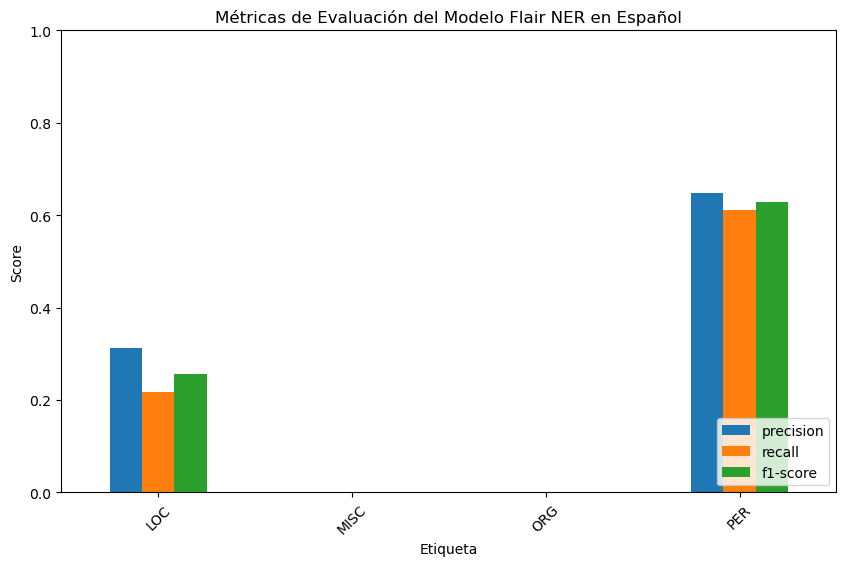

In [94]:
import json
from flair.data import Sentence
from flair.models import SequenceTagger
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el modelo preentrenado para español
tagger = SequenceTagger.load("ner")

# Ruta del archivo de validación
validation_file = "validation_set_flair.json"  # Actualiza esta ruta según sea necesario

# Leer el archivo de validación
with open(validation_file, "r", encoding="utf-8") as file:
    validation_data = json.load(file)

# Diccionario para almacenar las entidades y las predicciones
true_labels = []
pred_labels = []
labels = ["LOC", "MISC", "ORG", "PER"]

# Evaluar cada documento
for record in validation_data:
    text = record["text"]
    true_entities = [(ent["text"], ent["label"]) for ent in record["entities"]]

    # Crear una oración con el texto
    sentence = Sentence(text)

    # Realizar NER
    tagger.predict(sentence)

    # Obtener las entidades predichas
    pred_entities = [(entity.text, entity.labels[0].value) for entity in sentence.get_spans("ner")]

    # Crear listas de etiquetas por cada entidad
    true_entities_dict = {ent[0]: ent[1] for ent in true_entities}
    pred_entities_dict = {ent[0]: ent[1] for ent in pred_entities}
    
    all_keys = set(true_entities_dict.keys()).union(set(pred_entities_dict.keys()))
    
    for key in all_keys:
        true_labels.append(true_entities_dict.get(key, 'O'))
        pred_labels.append(pred_entities_dict.get(key, 'O'))

# Calcular las métricas por cada etiqueta
report = classification_report(true_labels, pred_labels, labels=labels, output_dict=True)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(report).transpose()

# Mostrar el DataFrame
print("Resultados del modelo Flair NER:")
print(results_df)

# Generar gráfica
results_df.drop(columns=["support"]).iloc[:-3].plot(kind="bar", figsize=(10, 6))
plt.title("Métricas de Evaluación del Modelo Flair NER en Español")
plt.xlabel("Etiqueta")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()


Documento documento_1:
Entidades verdaderas:
 - Junta de Andalucía (ORGANIZATION)
 - Alcalde de Sevilla (PERSON)
 - Juan Pérez (PERSON)
 - Sevilla (GPE)
 - Junta (ORGANIZATION)
Entidades predichas:
 - La (PERSON)
 - Junta (ORGANIZATION)
 - Andalucía (PERSON)
 - Sevilla (PERSON)
 - Juan Pérez (PERSON)
Documento documento_2:
Entidades verdaderas:
 - Diputación de Málaga (ORGANIZATION)
 - Francisco López (PERSON)
 - Málaga (GPE)
 - ciudad (GPE)
Entidades predichas:
 - El (GPE)
 - Málaga (PERSON)
 - Francisco López (PERSON)
Documento documento_3:
Entidades verdaderas:
 - Universidad de Granada (ORGANIZATION)
 - España (GPE)
Entidades predichas:
 - La (PERSON)
 - Universidad (ORGANIZATION)
 - Granada (PERSON)
 - España (PERSON)
Documento documento_4:
Entidades verdaderas:
 - Junta de Andalucía (ORGANIZATION)
 - Universidad de Sevilla (ORGANIZATION)
Entidades predichas:
 - La (PERSON)
 - Junta (ORGANIZATION)
 - Andalucía (PERSON)
 - Universidad (GPE)
 - Sevilla (GPE)
Documento documento_5:
E

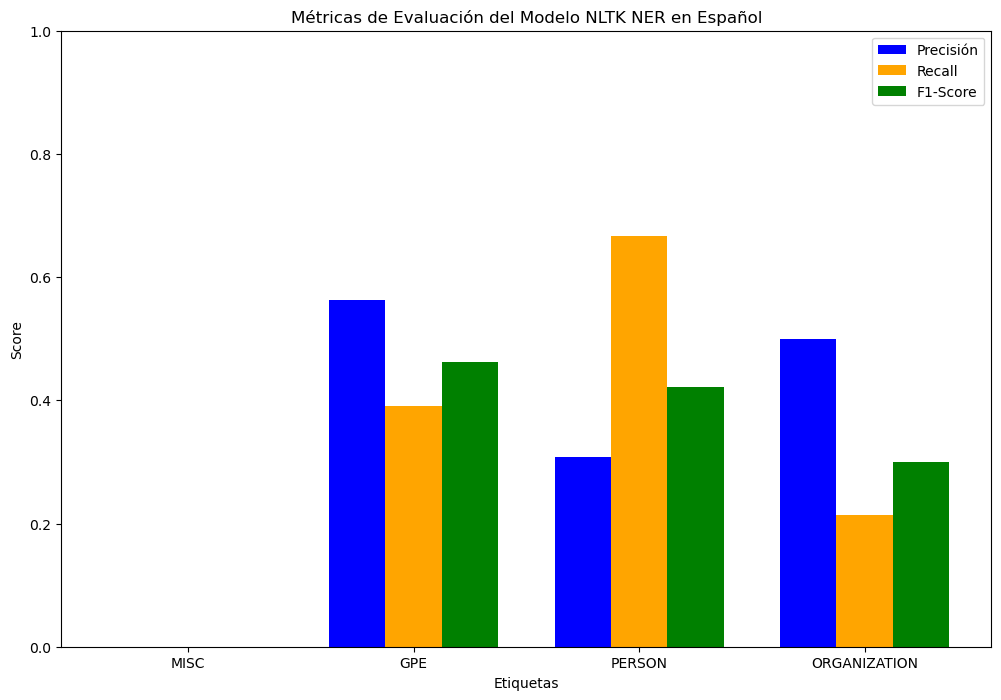

In [95]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Función para realizar el NER en un texto utilizando NLTK
def nltk_ner(text):
    # Tokenizar el texto
    tokens = word_tokenize(text)
    
    # Etiquetar las palabras con las etiquetas de POS (partes del discurso)
    tagged_tokens = pos_tag(tokens)
    
    # Utilizar un chunker para extraer las entidades nombradas del texto etiquetado
    ne_tree = ne_chunk(tagged_tokens)
    
    # Extraer las entidades nombradas del árbol
    named_entities = []
    for chunk in ne_tree:
        if hasattr(chunk, 'label'):
            named_entities.append((' '.join(c[0] for c in chunk), chunk.label()))
    
    return named_entities

# Función para calcular métricas de evaluación utilizando NLTK
def calculate_metrics(true_entities, pred_entities):
    # Mapeo de las etiquetas verdaderas a predichas
    true_labels = [label for _, label in true_entities]
    pred_labels = [label for _, label in pred_entities]
    
    # Asegurarse de que las etiquetas tengan la misma longitud
    if len(true_labels) != len(pred_labels):
        min_length = min(len(true_labels), len(pred_labels))
        true_labels = true_labels[:min_length]
        pred_labels = pred_labels[:min_length]

    labels = list(set(true_labels + pred_labels))
    precision, recall, f1, support = precision_recall_fscore_support(
        true_labels, pred_labels, labels=labels, zero_division=0
    )
    
    return precision, recall, f1, support, labels

# Ruta del archivo de validación
validation_file = "validation_set_nltk.json"

# Leer el archivo de validación
with open(validation_file, "r", encoding="utf-8") as file:
    validation_data = json.load(file)

# Listas para almacenar las métricas de todos los documentos
all_true_entities = []
all_pred_entities = []

# Evaluar cada documento
for record in validation_data:
    doc_id = record["id"]
    text = record["text"]
    true_entities = [(ent["text"], ent["label"]) for ent in record["entities"]]
    all_true_entities.extend(true_entities)
    
    # Realizar NER utilizando NLTK
    pred_entities = nltk_ner(text)
    all_pred_entities.extend(pred_entities)

    # Mostrar entidades por documento (opcional)
    print(f"Documento {doc_id}:")
    print("Entidades verdaderas:")
    for ent_text, ent_label in true_entities:
        print(f" - {ent_text} ({ent_label})")
    print("Entidades predichas:")
    for ent_text, ent_label in pred_entities:
        print(f" - {ent_text} ({ent_label})")

# Calcular métricas de evaluación
precision, recall, f1, support, labels = calculate_metrics(all_true_entities, all_pred_entities)

# Mostrar resultados detallados
print("\nResultados del modelo NLTK NER:")
print(f"{'Etiqueta':<10}{'Precisión':<10}{'Recall':<10}{'F1-Score':<10}{'Soporte':<10}")
for i, label in enumerate(labels):
    print(f"{label:<10}{precision[i]:<10.2f}{recall[i]:<10.2f}{f1[i]:<10.2f}{support[i]:<10}")

# Crear la gráfica de barras con desplazamiento
x = range(len(labels))
bar_width = 0.25  # Ancho de las barras

plt.figure(figsize=(12, 8))

# Crear las barras con desplazamiento en el eje x
plt.bar([p - bar_width for p in x], precision, width=bar_width, label='Precisión', color='blue', align='center')
plt.bar(x, recall, width=bar_width, label='Recall', color='orange', align='center')
plt.bar([p + bar_width for p in x], f1, width=bar_width, label='F1-Score', color='green', align='center')

plt.xlabel('Etiquetas')
plt.ylabel('Score')
plt.title('Métricas de Evaluación del Modelo NLTK NER en Español')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.show()



This is the model card for the EMNLP 2021 paper WikiNEuRal: Combined Neural and Knowledge-based Silver Data Creation for Multilingual NER. We fine-tuned a multilingual language model (mBERT) for 3 epochs on our WikiNEuRal dataset for Named Entity Recognition (NER). The resulting multilingual NER model supports the 9 languages covered by WikiNEuRal (de, en, es, fr, it, nl, pl, pt, ru), and it was trained on all 9 languages jointly.

Documento documento_1:
Entidades verdaderas: [('Junta de Andalucía', 'ORG'), ('Alcalde de Sevilla', 'PER'), ('Juan Pérez', 'PER'), ('Sevilla', 'LOC'), ('Junta', 'ORG')]
Entidades predichas: [('Junta de Andalucía', 'ORG'), ('Sevilla', 'LOC'), ('Juan Pérez', 'PER'), ('Junta', 'ORG')]

Documento documento_2:
Entidades verdaderas: [('Diputación de Málaga', 'ORG'), ('Francisco López', 'PER'), ('Málaga', 'LOC'), ('ciudad', 'LOC')]
Entidades predichas: [('Diputación de Málaga', 'LOC'), ('Francisco López', 'PER')]

Documento documento_3:
Entidades verdaderas: [('Universidad de Granada', 'ORG'), ('España', 'LOC')]
Entidades predichas: [('Universidad de Granada', 'ORG'), ('España', 'LOC')]

Documento documento_4:
Entidades verdaderas: [('Junta de Andalucía', 'ORG'), ('Universidad de Sevilla', 'ORG')]
Entidades predichas: [('Junta de Andalucía', 'ORG'), ('Universidad de Sevilla', 'ORG')]

Documento documento_5:
Entidades verdaderas: [('Presidente del Gobierno', 'PER'), ('Pedro Sánchez', 'PER'), (

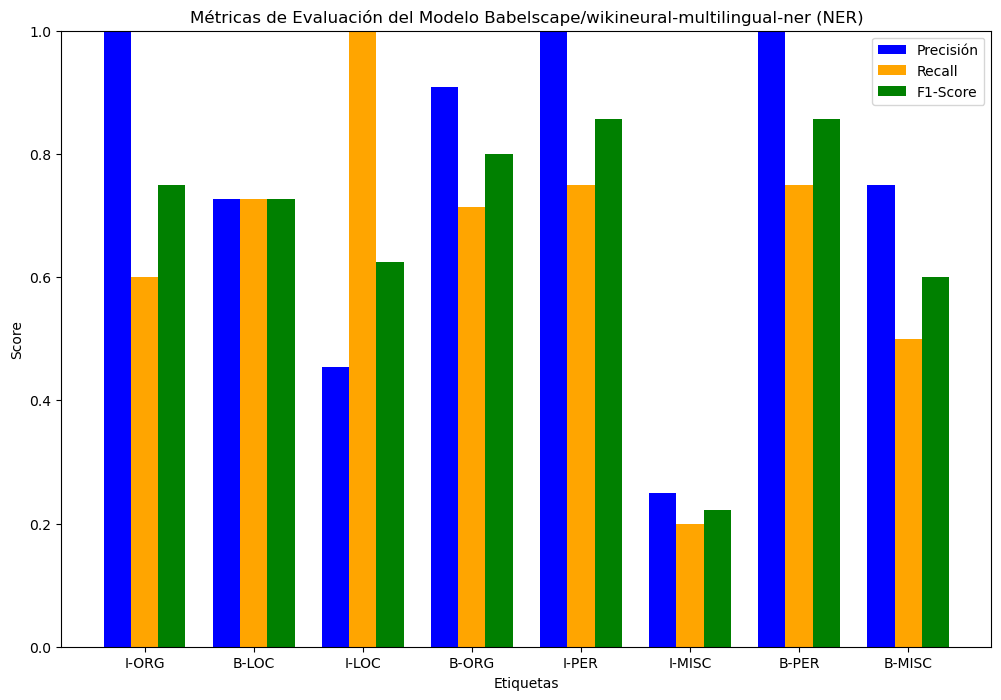

In [96]:
import json
import re
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Cargar el modelo y el tokenizador de Hugging Face
model_name = "Babelscape/wikineural-multilingual-ner"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Crear una tubería de NER
nlp = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Ruta del archivo de validación
validation_file = "validation_set_flair.json"

# Leer el archivo de validación
with open(validation_file, "r", encoding="utf-8") as file:
    validation_data = json.load(file)

# Listas para almacenar las etiquetas verdaderas y predichas
true_labels = []
pred_labels = []

def align_labels(true_entities, pred_entities, text):
    words = text.split()
    true_labels = ['O'] * len(words)
    pred_labels = ['O'] * len(words)

    def apply_labels(entities, labels):
        for entity, label in entities:
            pattern = re.escape(entity)
            matches = list(re.finditer(pattern, text))
            for match in matches:
                start_idx = len(text[:match.start()].split())
                entity_len = len(entity.split())
                labels[start_idx] = f"B-{label}"
                for i in range(1, entity_len):
                    if start_idx + i < len(labels):
                        labels[start_idx + i] = f"I-{label}"
        return labels

    true_labels = apply_labels(true_entities, true_labels)
    pred_labels = apply_labels(pred_entities, pred_labels)
    
    return true_labels, pred_labels

# Evaluar cada documento
for record in validation_data:
    doc_id = record["id"]
    text = record["text"]
    true_entities = [(ent["text"], ent["label"]) for ent in record["entities"]]

    # Realizar NER
    ner_results = nlp(text)

    # Convertir los resultados de NER en un formato compatible con seqeval
    pred_entities = [(result["word"], result["entity_group"]) for result in ner_results]

    # Alinear las etiquetas verdaderas y predichas
    true_tags, pred_tags = align_labels(true_entities, pred_entities, text)

    # Agregar las etiquetas a las listas
    true_labels.append(true_tags)
    pred_labels.append(pred_tags)

    print(f"Documento {doc_id}:")
    print(f"Entidades verdaderas: {true_entities}")
    print(f"Entidades predichas: {pred_entities}\n")

# Calcular y mostrar las métricas
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print("Modelo mBERT Wikineural entrenado (NER):")

print(f"Métricas promedio:")
print(f"Precisión promedio: {precision:.2f}")
print(f"Recall promedio: {recall:.2f}")
print(f"F1 promedio: {f1:.2f}")

# Mostrar el informe de clasificación detallado
report = classification_report(true_labels, pred_labels)
print(report)

# Extraer métricas por etiqueta para la gráfica
labels = list(set([label for sublist in true_labels for label in sublist if label != 'O']))
precision_by_label = {}
recall_by_label = {}
f1_by_label = {}

for label in labels:
    true_labels_filtered = [[l if l == label or l == 'O' else 'O' for l in sublist] for sublist in true_labels]
    pred_labels_filtered = [[l if l == label or l == 'O' else 'O' for l in sublist] for sublist in pred_labels]

    precision_by_label[label] = precision_score(true_labels_filtered, pred_labels_filtered)
    recall_by_label[label] = recall_score(true_labels_filtered, pred_labels_filtered)
    f1_by_label[label] = f1_score(true_labels_filtered, pred_labels_filtered)

# Crear la gráfica de barras con desplazamiento
x = range(len(labels))
bar_width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 8))

# Crear las barras con desplazamiento en el eje x
precision_vals = [precision_by_label[label] for label in labels]
recall_vals = [recall_by_label[label] for label in labels]
f1_vals = [f1_by_label[label] for label in labels]

ax.bar([p - bar_width for p in x], precision_vals, width=bar_width, label='Precisión', color='blue', align='center')
ax.bar(x, recall_vals, width=bar_width, label='Recall', color='orange', align='center')
ax.bar([p + bar_width for p in x], f1_vals, width=bar_width, label='F1-Score', color='green', align='center')

ax.set_xlabel('Etiquetas')
ax.set_ylabel('Score')
ax.set_title('Métricas de Evaluación del Modelo Babelscape/wikineural-multilingual-ner (NER)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

plt.show()



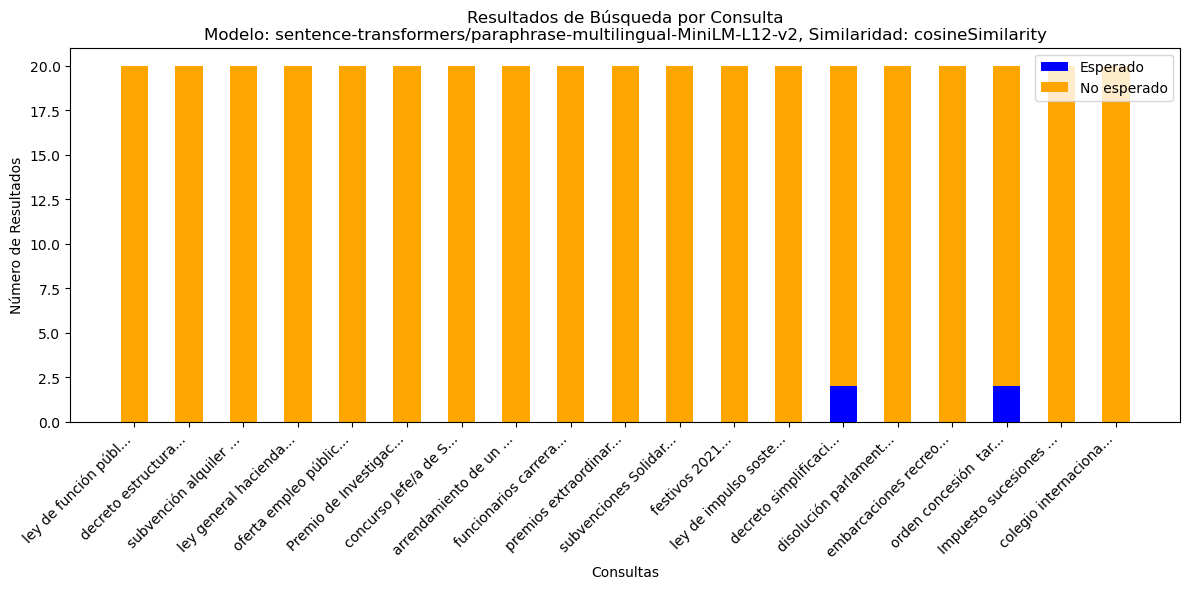

Precisión final: 0.11


In [11]:
import csv
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Configurar el modelo de embeddings y el tipo de búsqueda
model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
similarity_type = 'cosineSimilarity'  # Cambiamos a 'cosineSimilarity'
model = SentenceTransformer(model_name)

# Función para realizar una búsqueda en Elasticsearch utilizando embeddings
def search_by_embedding(embedding, index_name, es, top_k=20):
    query = {
        "size": top_k,
        "query": {
            "script_score": {
                "query": {"match_all": {}},
                "script": {
                    "source": f"{similarity_type}(params.query_vector, 'embedding') + 1.0",  # Aseguramos que el score sea no negativo
                    "params": {"query_vector": embedding}
                }
            }
        }
    }
    try:
        response = es.search(index=index_name, body=query)
        return [hit['_id'] for hit in response['hits']['hits']]
    except Exception as e:
        print(f"Error during search: {e}")
        if hasattr(e, 'info'):
            print(f"Error info: {e.info}")
        if hasattr(e, 'error'):
            print(f"Error details: {e.error}")
        return []

# Función para generar y verificar embeddings de consultas
def generate_and_search(query_text):
    embedding = model.encode(query_text).tolist()
    if len(embedding) != 384:
        print(f"Error: Embedding tiene dimensiones incorrectas: {len(embedding)}")
        return []
    return search_by_embedding(embedding, 'boja_index2', es)

# Función para mostrar resultados en gráficos de barras apiladas
def show_results(queries, expected_ids, top_k=20):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    for i, query in enumerate(queries):
        results = generate_and_search(query)
        expected = expected_ids[i]

        expected_count = sum(1 for result in results if result in expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: {similarity_type}')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final: {precision:.2f}')

# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = []
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Mostrar resultados
show_results(queries, expected_ids)




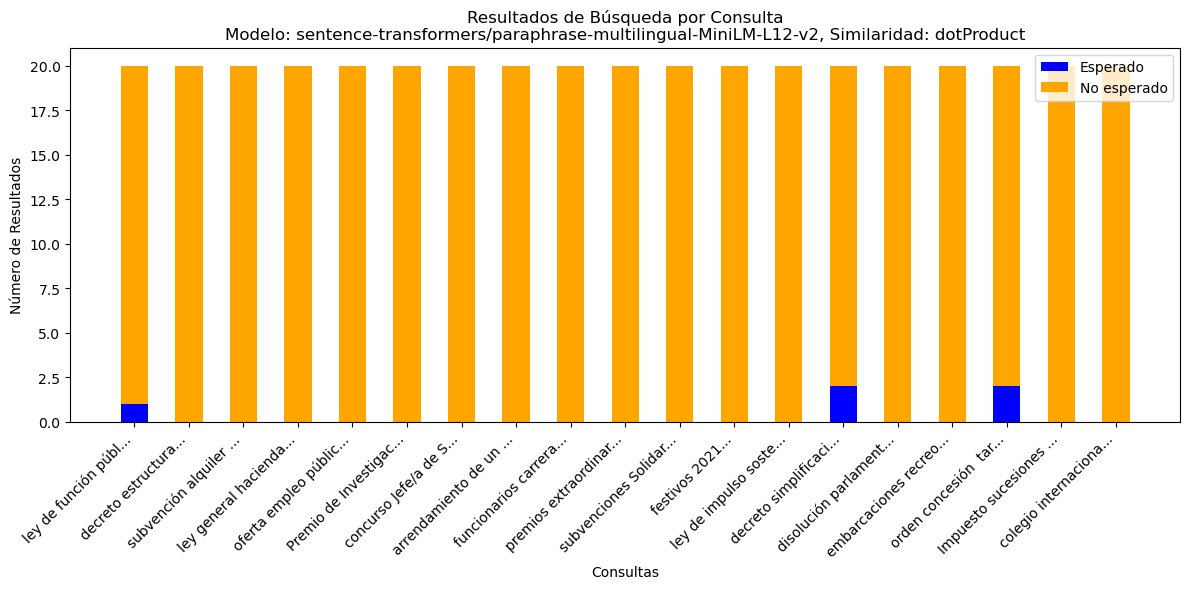

Precisión final: 0.16


In [3]:
import csv
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Configurar el modelo de embeddings y el tipo de búsqueda
model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
similarity_type = 'dotProduct'
model = SentenceTransformer(model_name)

# Función para realizar una búsqueda en Elasticsearch utilizando embeddings
def search_by_embedding(embedding, index_name, es, top_k=20):
    query = {
        "size": top_k,
        "query": {
            "script_score": {
                "query": {"match_all": {}},
                "script": {
                    # Añadir una constante suficientemente grande para asegurar que el score sea no negativo
                    "source": "dotProduct(params.query_vector, 'embedding') + 5.0",
                    "params": {"query_vector": embedding}
                }
            }
        }
    }
    try:
        response = es.search(index=index_name, body=query)
        return [hit['_id'] for hit in response['hits']['hits']]
    except Exception as e:
        print(f"Error during search: {e}")
        if hasattr(e, 'info'):
            print(f"Error info: {e.info}")
        if hasattr(e, 'error'):
            print(f"Error details: {e.error}")
        return []

# Función para generar y verificar embeddings de consultas
def generate_and_search(query_text):
    embedding = model.encode(query_text).tolist()
    if len(embedding) != 384:
        print(f"Error: Embedding tiene dimensiones incorrectas: {len(embedding)}")
        return []
    return search_by_embedding(embedding, 'boja_index2', es)

# Función para mostrar resultados en gráficos de barras apiladas
def show_results(queries, expected_ids, top_k=20):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    for i, query in enumerate(queries):
        results = generate_and_search(query)
        expected = expected_ids[i]

        expected_count = sum(1 for result in results if result in expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: {similarity_type}')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final: {precision:.2f}')

# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = []
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Mostrar resultados
show_results(queries, expected_ids)



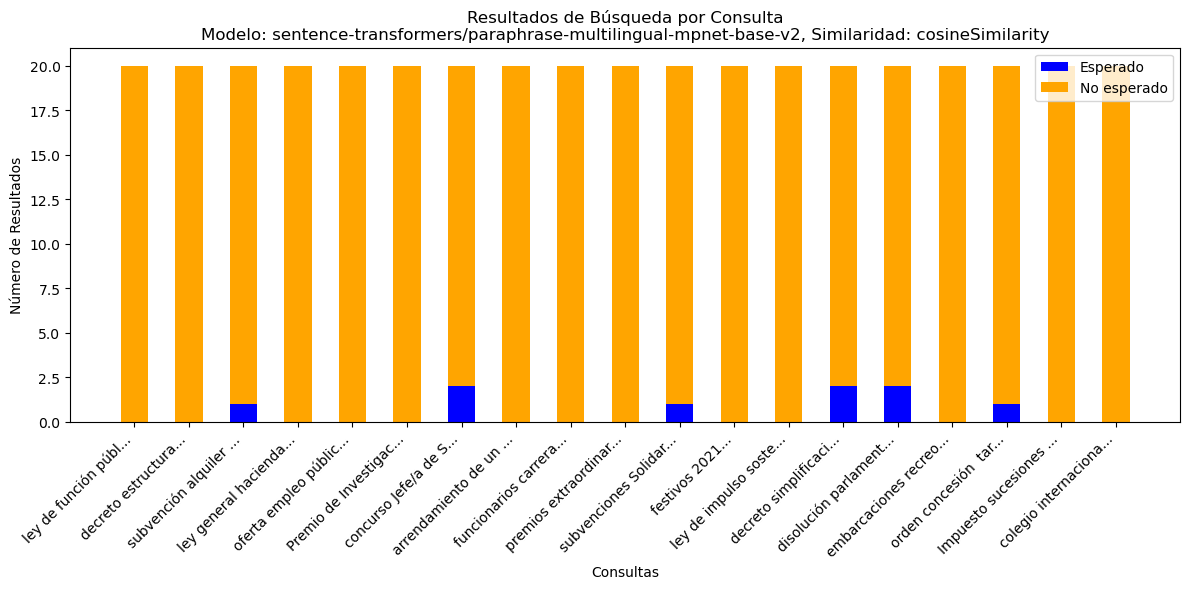

Precisión final: 0.32


In [9]:
import csv
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Configurar el modelo de embeddings y el tipo de búsqueda
model_name = 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
similarity_type = 'cosineSimilarity'  # Puede ser 'cosineSimilarity' o 'dotProduct'
model = SentenceTransformer(model_name)

# Función para realizar una búsqueda en Elasticsearch utilizando embeddings
def search_by_embedding(embedding, index_name, es, top_k=20):
    query = {
        "size": top_k,
        "query": {
            "script_score": {
                "query": {"match_all": {}},
                "script": {
                    "source": f"{similarity_type}(params.query_vector, 'embedding') + 1.0",
                    "params": {"query_vector": embedding}
                }
            }
        }
    }
    try:
        response = es.search(index=index_name, body=query)
        return [hit['_id'] for hit in response['hits']['hits']]
    except Exception as e:
        print(f"Error during search: {e}")
        return []

# Función para generar y verificar embeddings de consultas
def generate_and_search(query_text):
    embedding = model.encode(query_text).tolist()
    if len(embedding) != model.get_sentence_embedding_dimension():
        print(f"Error: Embedding tiene dimensiones incorrectas: {len(embedding)}")
        return []
    return search_by_embedding(embedding, 'boja_index', es)

# Función para mostrar resultados en gráficos de barras apiladas
def show_results(queries, expected_ids, top_k=20):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    for i, query in enumerate(queries):
        results = generate_and_search(query)
        expected = expected_ids[i]

        expected_count = sum(1 for result in results if result in expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: {similarity_type}')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final: {precision:.2f}')

# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = [] 
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Mostrar resultados
show_results(queries, expected_ids)


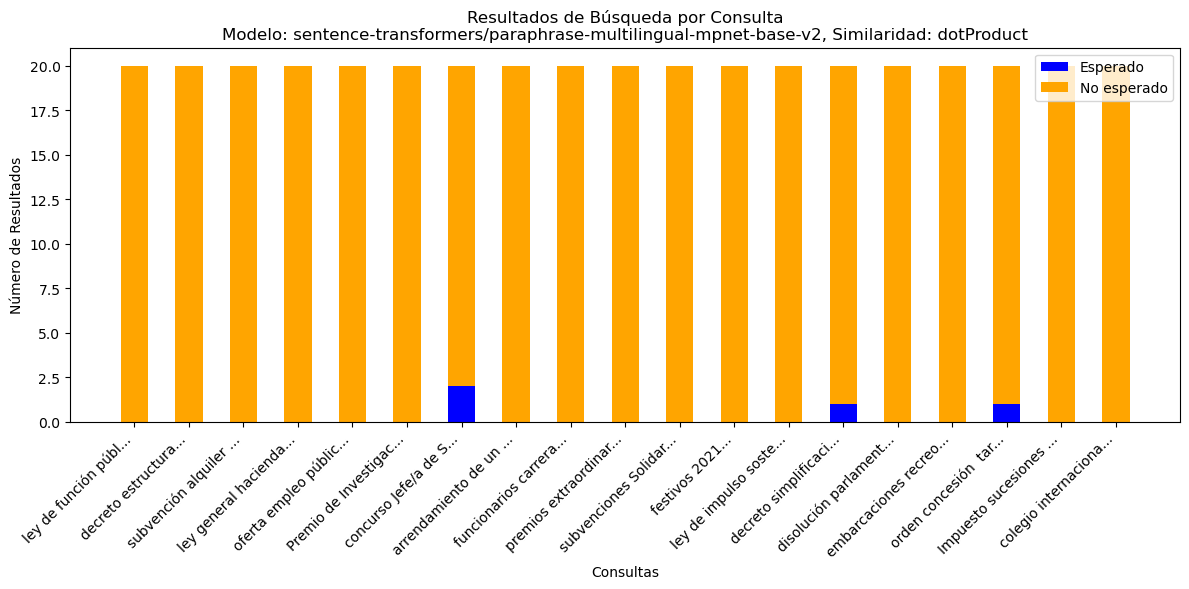

Precisión final: 0.16


In [10]:
import csv
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Configurar el modelo de embeddings y el tipo de búsqueda
model_name = 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
similarity_type = 'dotProduct'  # Ahora utilizamos 'dotProduct'
model = SentenceTransformer(model_name)

# Función para realizar una búsqueda en Elasticsearch utilizando embeddings
def search_by_embedding(embedding, index_name, es, top_k=20):
    query = {
        "size": top_k,
        "query": {
            "script_score": {
                "query": {"match_all": {}},
                "script": {
                    "source": f"{similarity_type}(params.query_vector, 'embedding') + 1.0",
                    "params": {"query_vector": embedding}
                }
            }
        }
    }
    try:
        response = es.search(index=index_name, body=query)
        return [hit['_id'] for hit in response['hits']['hits']]
    except Exception as e:
        print(f"Error during search: {e}")
        return []

# Función para generar y verificar embeddings de consultas
def generate_and_search(query_text):
    embedding = model.encode(query_text).tolist()
    if len(embedding) != 768:
        print(f"Error: Embedding tiene dimensiones incorrectas: {len(embedding)}")
        return []
    return search_by_embedding(embedding, 'boja_index', es)

# Función para mostrar resultados en gráficos de barras apiladas
def show_results(queries, expected_ids, top_k=20):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    for i, query in enumerate(queries):
        results = generate_and_search(query)
        expected = expected_ids[i]

        expected_count = sum(1 for result in results if result in expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: {similarity_type}')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final: {precision:.2f}')

# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = []
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Mostrar resultados
show_results(queries, expected_ids)




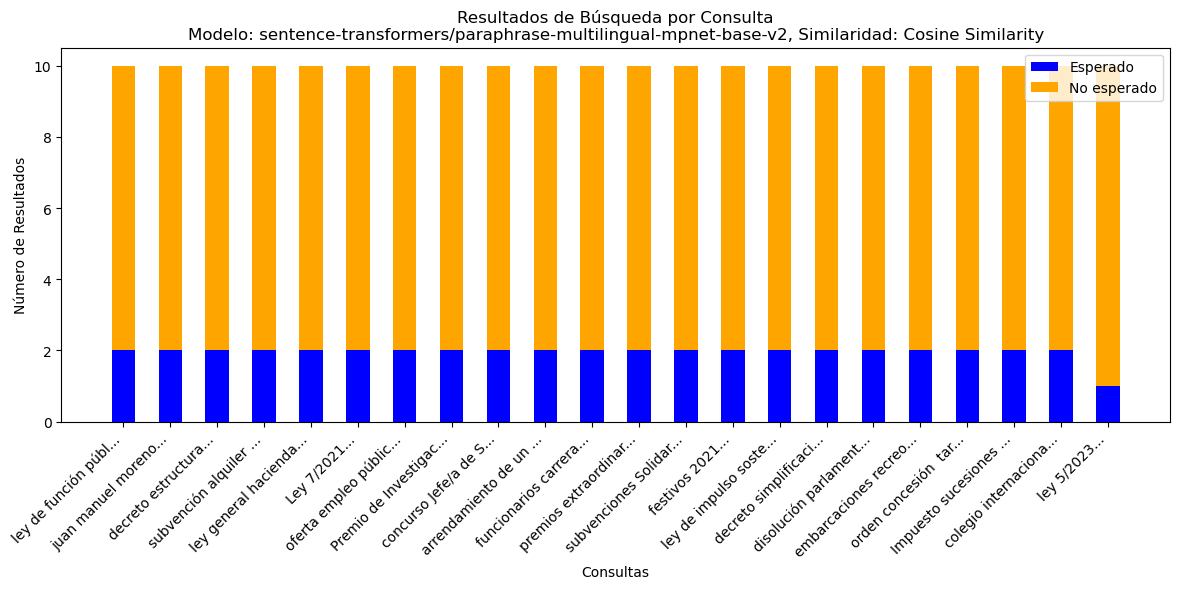

Precisión final: 1.00


In [101]:
import csv
from elasticsearch import Elasticsearch, ConnectionError
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np
import re

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Cargar el modelo de embeddings
model_name = 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
model = SentenceTransformer(model_name)

# Función para generar embeddings
def generate_embedding(text):
    return model.encode(text).tolist()

# Función para realizar una búsqueda en Elasticsearch utilizando múltiples campos y embeddings
def realizar_busqueda(user_query, start_date, end_date):
    terms = user_query.split()
    
    # Generar el embedding de la consulta
    query_embedding = generate_embedding(user_query)

    # Función para realizar búsquedas en diferentes campos
    def search_in_field(field, query, start_date, end_date, size=10):
        must_conditions = [
            {"multi_match": {"query": query, "fields": [field], "operator": "and"}}
        ]
        
        if start_date and end_date:
            must_conditions.append({"range": {"d_date": {"gte": start_date, "lte": end_date}}})
        
        try:
            response = es.search(index="boja_index", body={
                "query": {
                    "bool": {
                        "must": must_conditions
                    }
                },
                "size": size
            })
            return response['hits']['hits']
        except ConnectionError as e:
            print(f"Error de conexión: {e}")
            return []

    # Realizar búsquedas por cada campo especificado
    results_sumario = search_in_field("t_asumarioNoHtml", user_query, start_date, end_date, 10)
    results_cuerpo = search_in_field("t_bodyNoHtml", user_query, start_date, end_date, 10)
    results_entities_asumario = search_in_field("entities_asumario", user_query, start_date, end_date, 5)
    results_entities_body = search_in_field("entities_body", user_query, start_date, end_date, 5)

    # Realizar la consulta de búsqueda por embeddings con rango de fechas si se proporcionan
    if start_date and end_date:
        try:
            response_embeddings = es.search(index="boja_index", body={
                "query": {
                    "bool": {
                        "must": {
                            "script_score": {
                                "query": {"match_all": {}},
                                "script": {
                                    "source": "cosineSimilarity(params.query_vector, 'embedding') + 1.0",
                                    "params": {"query_vector": query_embedding}
                                }
                            }
                        },
                        "filter": {
                            "range": {"d_date": {"gte": start_date, "lte": end_date}}
                        }
                    }
                },
                "size": 10
            })
            results_embeddings = response_embeddings['hits']['hits']
        except ConnectionError as e:
            print(f"Error de conexión: {e}")
            results_embeddings = []
    else:
        try:
            response_embeddings = es.search(index="boja_index", body={
                "query": {
                    "script_score": {
                        "query": {"match_all": {}},
                        "script": {
                            "source": "cosineSimilarity(params.query_vector, 'embedding') + 1.0",
                            "params": {"query_vector": query_embedding}
                        }
                    }
                },
                "size": 10
            })
            results_embeddings = response_embeddings['hits']['hits']
        except ConnectionError as e:
            print(f"Error de conexión: {e}")
            results_embeddings = []

    # Combinar los resultados eliminando duplicados
    combined_results = {hit['_id']: hit for hit in (results_sumario + results_cuerpo + results_entities_asumario + results_entities_body + results_embeddings)}
    combined_results = list(combined_results.values())[:30]  # Obtener los primeros 30 resultados

    # Crear la salida en HTML y aplicar el resaltado
    results = []
    for hit in combined_results:
        sumario = hit['_source'].get('t_asumarioNoHtml', '')
        cuerpo = hit['_source'].get('t_bodyNoHtml', '')

        # Omitir resultados sin sumario ni cuerpo
        if not sumario and not cuerpo:
            continue

        url = hit['_source']['t_publicUrl']
        fecha = hit['_source']['d_date']
        
        result = {
            "ID": hit['_id'],
            "URL": url,
            "Fecha": fecha,
            "Sumario": sumario,
            "Cuerpo": cuerpo
        }
        results.append(result)

    return results

# Función para evaluar la búsqueda y generar métricas
def evaluar_busqueda(queries, expected_ids, start_date, end_date, top_k=10):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    for i, query in enumerate(queries):
        results = realizar_busqueda(query, start_date, end_date)
        obtained_ids = [result["ID"] for result in results]
        expected = expected_ids[i]

        expected_count = sum(1 for result in obtained_ids if result in expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: Cosine Similarity')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final: {precision:.2f}')

# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = []
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Evaluar las búsquedas y mostrar resultados
start_date = "1983-01-01"
end_date = "2024-05-26"

evaluar_busqueda(queries, expected_ids, start_date, end_date)



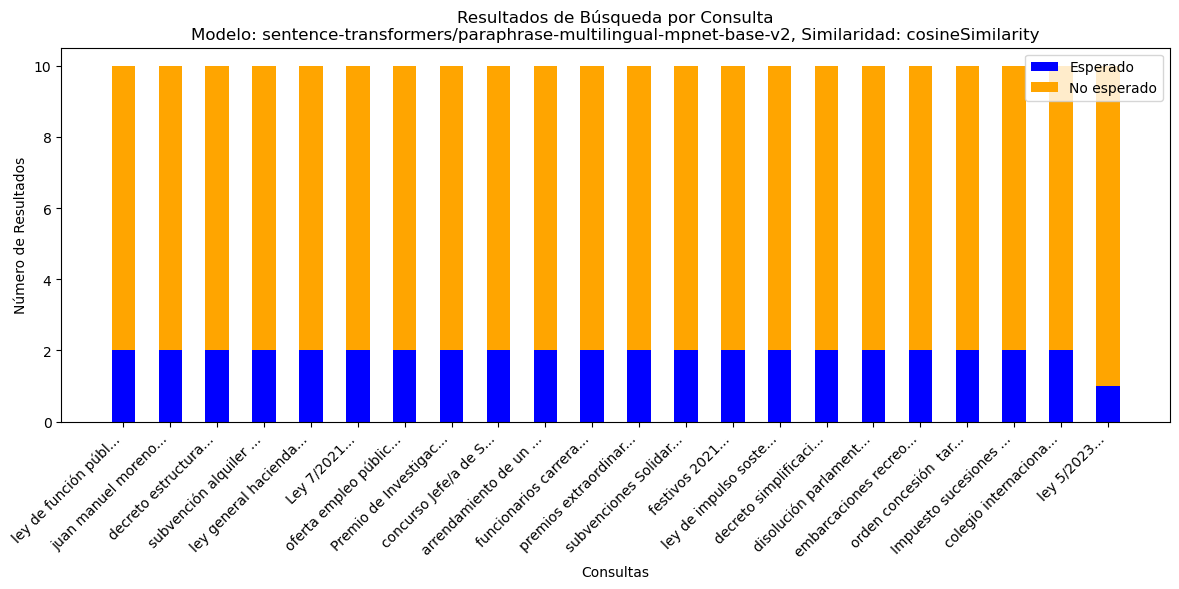

Precisión final (1 resultado): 1.00
Resultados por tipo de búsqueda:
Total resultados en sumario: 131
Total resultados en cuerpo: 210
Total resultados en entidades de sumario: 5
Total resultados en entidades de cuerpo: 21
Total resultados en embeddings: 220
Precisión en sumario: 0.24
Precisión en cuerpo: 0.13
Precisión en entidades de sumario: 0.20
Precisión en entidades de cuerpo: 0.05
Precisión en embeddings: 0.03


In [102]:
import csv
from elasticsearch import Elasticsearch, ConnectionError
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Cargar el modelo de embeddings
model_name = 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
model = SentenceTransformer(model_name)

# Función para generar embeddings
def generate_embedding(text):
    return model.encode(text).tolist()

# Función para realizar una búsqueda en Elasticsearch utilizando múltiples campos y embeddings
def realizar_busqueda(user_query, start_date, end_date):
    terms = user_query.split()
    
    # Generar el embedding de la consulta
    query_embedding = generate_embedding(user_query)

    # Función para realizar búsquedas en diferentes campos
    def search_in_field(field, query, start_date, end_date, size=10):
        must_conditions = [
            {"multi_match": {"query": query, "fields": [field], "operator": "and"}}
        ]
        
        if start_date and end_date:
            must_conditions.append({"range": {"d_date": {"gte": start_date, "lte": end_date}}})
        
        try:
            response = es.search(index="boja_index", body={
                "query": {
                    "bool": {
                        "must": must_conditions
                    }
                },
                "size": size
            })
            return response['hits']['hits']
        except ConnectionError as e:
            print(f"Error de conexión: {e}")
            return []

    # Realizar búsquedas por cada campo especificado
    results_sumario = search_in_field("t_asumarioNoHtml", user_query, start_date, end_date, 10)
    results_cuerpo = search_in_field("t_bodyNoHtml", user_query, start_date, end_date, 10)
    results_entities_asumario = search_in_field("entities_asumario", user_query, start_date, end_date, 5)
    results_entities_body = search_in_field("entities_body", user_query, start_date, end_date, 5)

    # Realizar la consulta de búsqueda por embeddings con rango de fechas si se proporcionan
    if start_date and end_date:
        try:
            response_embeddings = es.search(index="boja_index", body={
                "query": {
                    "bool": {
                        "must": {
                            "script_score": {
                                "query": {"match_all": {}},
                                "script": {
                                    "source": "cosineSimilarity(params.query_vector, 'embedding') + 1.0",
                                    "params": {"query_vector": query_embedding}
                                }
                            }
                        },
                        "filter": {
                            "range": {"d_date": {"gte": start_date, "lte": end_date}}
                        }
                    }
                },
                "size": 10
            })
            results_embeddings = response_embeddings['hits']['hits']
        except ConnectionError as e:
            print(f"Error de conexión: {e}")
            results_embeddings = []
    else:
        try:
            response_embeddings = es.search(index="boja_index", body={
                "query": {
                    "script_score": {
                        "query": {"match_all": {}},
                        "script": {
                            "source": "cosineSimilarity(params.query_vector, 'embedding') + 1.0",
                            "params": {"query_vector": query_embedding}
                        }
                    }
                },
                "size": 10
            })
            results_embeddings = response_embeddings['hits']['hits']
        except ConnectionError as e:
            print(f"Error de conexión: {e}")
            results_embeddings = []

    return {
        'sumario': results_sumario,
        'cuerpo': results_cuerpo,
        'entities_asumario': results_entities_asumario,
        'entities_body': results_entities_body,
        'embeddings': results_embeddings
    }

# Función para evaluar la búsqueda y generar métricas
def evaluar_busqueda(queries, expected_ids, start_date, end_date, top_k=10):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    total_sumario = 0
    total_cuerpo = 0
    total_entities_asumario = 0
    total_entities_body = 0
    total_embeddings = 0

    sumario_hits = 0
    cuerpo_hits = 0
    entities_asumario_hits = 0
    entities_body_hits = 0
    embeddings_hits = 0

    for i, query in enumerate(queries):
        results = realizar_busqueda(query, start_date, end_date)
        obtained_ids = set(hit["_id"] for hit in results['sumario'] + results['cuerpo'] + results['entities_asumario'] + results['entities_body'] + results['embeddings'])
        expected = set(expected_ids[i])

        expected_count = len(obtained_ids & expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        total_sumario += len(results['sumario'])
        total_cuerpo += len(results['cuerpo'])
        total_entities_asumario += len(results['entities_asumario'])
        total_entities_body += len(results['entities_body'])
        total_embeddings += len(results['embeddings'])

        sumario_hits += sum(1 for hit in results['sumario'] if hit["_id"] in expected)
        cuerpo_hits += sum(1 for hit in results['cuerpo'] if hit["_id"] in expected)
        entities_asumario_hits += sum(1 for hit in results['entities_asumario'] if hit["_id"] in expected)
        entities_body_hits += sum(1 for hit in results['entities_body'] if hit["_id"] in expected)
        embeddings_hits += sum(1 for hit in results['embeddings'] if hit["_id"] in expected)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: cosineSimilarity')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final (1 resultado): {precision:.2f}')
    print(f'Resultados por tipo de búsqueda:')
    print(f'Total resultados en sumario: {total_sumario}')
    print(f'Total resultados en cuerpo: {total_cuerpo}')
    print(f'Total resultados en entidades de sumario: {total_entities_asumario}')
    print(f'Total resultados en entidades de cuerpo: {total_entities_body}')
    print(f'Total resultados en embeddings: {total_embeddings}')

    print(f'Precisión en sumario: {sumario_hits / total_sumario:.2f}' if total_sumario > 0 else 'Precisión en sumario: N/A')
    print(f'Precisión en cuerpo: {cuerpo_hits / total_cuerpo:.2f}' if total_cuerpo > 0 else 'Precisión en cuerpo: N/A')
    print(f'Precisión en entidades de sumario: {entities_asumario_hits / total_entities_asumario:.2f}' if total_entities_asumario > 0 else 'Precisión en entidades de sumario: N/A')
    print(f'Precisión en entidades de cuerpo: {entities_body_hits / total_entities_body:.2f}' if total_entities_body > 0 else 'Precisión en entidades de cuerpo: N/A')
    print(f'Precisión en embeddings: {embeddings_hits / total_embeddings:.2f}' if total_embeddings > 0 else 'Precisión en embeddings: N/A')

# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = []
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Evaluar las búsquedas y mostrar resultados
start_date = "1983-01-01"
end_date = "2024-05-26"

evaluar_busqueda(queries, expected_ids, start_date, end_date)




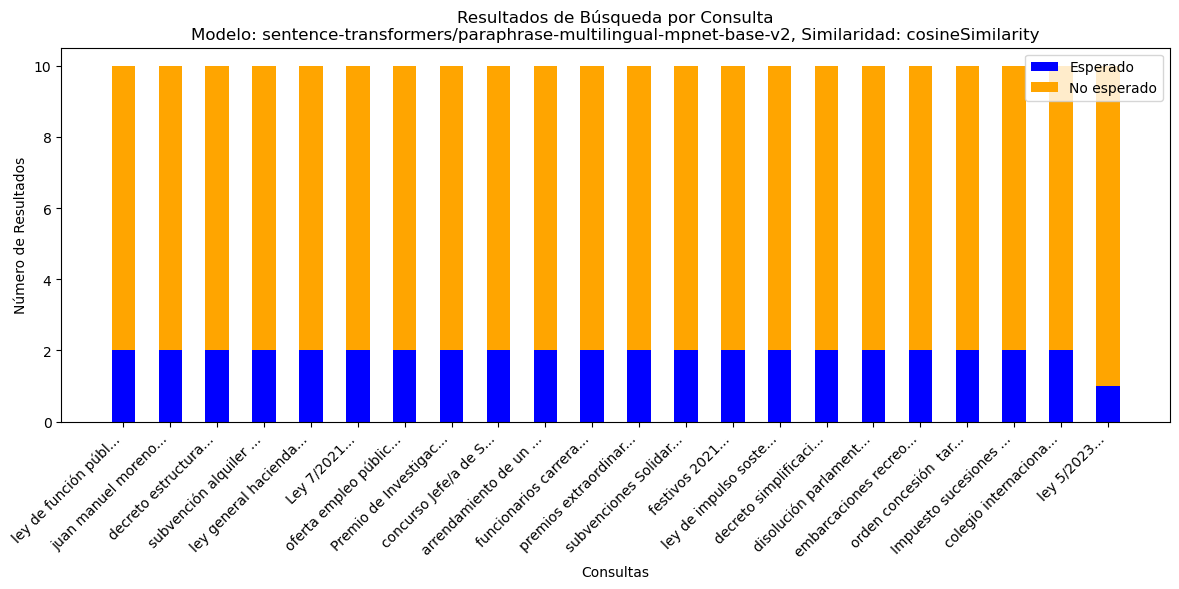

Precisión final (los dos resultados): 1.00
Resultados por tipo de búsqueda:
Total resultados en sumario: 131
Total resultados en cuerpo: 210
Total resultados en entidades de sumario: 5
Total resultados en entidades de cuerpo: 21
Total resultados en embeddings: 220
Precisión en sumario: 0.48
Precisión en cuerpo: 0.40
Precisión en entidades de sumario: 0.01
Precisión en entidades de cuerpo: 0.01
Precisión en embeddings: 0.09


In [103]:
import csv
from elasticsearch import Elasticsearch, ConnectionError
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Conectar a Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

# Cargar el modelo de embeddings
model_name = 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
model = SentenceTransformer(model_name)

# Función para generar embeddings
def generate_embedding(text):
    return model.encode(text).tolist()

# Función para evaluar la búsqueda y generar métricas
def evaluar_busqueda(queries, expected_ids, start_date, end_date, top_k=10):
    num_queries = len(queries)
    expected_counts = []
    unexpected_counts = []
    successful_queries = 0

    total_sumario = 0
    total_cuerpo = 0
    total_entities_asumario = 0
    total_entities_body = 0
    total_embeddings = 0

    sumario_hits = 0
    cuerpo_hits = 0
    entities_asumario_hits = 0
    entities_body_hits = 0
    embeddings_hits = 0

    for i, query in enumerate(queries):
        results = realizar_busqueda(query, start_date, end_date)
        obtained_ids = set(hit["_id"] for hit in results['sumario'] + results['cuerpo'] + results['entities_asumario'] + results['entities_body'] + results['embeddings'])
        expected = set(expected_ids[i])

        expected_count = len(obtained_ids & expected)
        unexpected_count = top_k - expected_count

        expected_counts.append(expected_count)
        unexpected_counts.append(unexpected_count)

        total_sumario += len(results['sumario'])
        total_cuerpo += len(results['cuerpo'])
        total_entities_asumario += len(results['entities_asumario'])
        total_entities_body += len(results['entities_body'])
        total_embeddings += len(results['embeddings'])

        sumario_hits += sum(1 for hit in results['sumario'] if hit["_id"] in expected)
        cuerpo_hits += sum(1 for hit in results['cuerpo'] if hit["_id"] in expected)
        entities_asumario_hits += sum(1 for hit in results['entities_asumario'] if hit["_id"] in expected)
        entities_body_hits += sum(1 for hit in results['entities_body'] if hit["_id"] in expected)
        embeddings_hits += sum(1 for hit in results['embeddings'] if hit["_id"] in expected)

        if expected_count > 0:
            successful_queries += 1

    bar_width = 0.5
    indices = np.arange(num_queries)

    fig, ax = plt.subplots(figsize=(12, 6))
    p1 = ax.bar(indices, expected_counts, bar_width, label='Esperado', color='blue')
    p2 = ax.bar(indices, unexpected_counts, bar_width, bottom=expected_counts, label='No esperado', color='orange')

    ax.set_xlabel('Consultas')
    ax.set_ylabel('Número de Resultados')
    ax.set_title(f'Resultados de Búsqueda por Consulta\nModelo: {model_name}, Similaridad: cosineSimilarity')
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{query[:20]}...' for query in queries], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

    precision = successful_queries / num_queries
    print(f'Precisión final (los dos resultados): {precision:.2f}')
    print(f'Resultados por tipo de búsqueda:')

    total_results = total_sumario + total_cuerpo + total_entities_asumario + total_entities_body + total_embeddings
    total_hits = sumario_hits + cuerpo_hits + entities_asumario_hits + entities_body_hits + embeddings_hits

    print(f'Total resultados en sumario: {total_sumario}')
    print(f'Total resultados en cuerpo: {total_cuerpo}')
    print(f'Total resultados en entidades de sumario: {total_entities_asumario}')
    print(f'Total resultados en entidades de cuerpo: {total_entities_body}')
    print(f'Total resultados en embeddings: {total_embeddings}')

    print(f'Precisión en sumario: {sumario_hits / total_hits:.2f}' if total_hits > 0 else 'Precisión en sumario: N/A')
    print(f'Precisión en cuerpo: {cuerpo_hits / total_hits:.2f}' if total_hits > 0 else 'Precisión en cuerpo: N/A')
    print(f'Precisión en entidades de sumario: {entities_asumario_hits / total_hits:.2f}' if total_hits > 0 else 'Precisión en entidades de sumario: N/A')
    print(f'Precisión en entidades de cuerpo: {entities_body_hits / total_hits:.2f}' if total_hits > 0 else 'Precisión en entidades de cuerpo: N/A')
    print(f'Precisión en embeddings: {embeddings_hits / total_hits:.2f}' if total_hits > 0 else 'Precisión en embeddings: N/A')


# Leer y procesar el archivo CSV
csv_file = 'validacion_embedings.csv'
queries = []
expected_ids = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        queries.append(row[0])
        expected_ids.append(row[1:3])

# Evaluar las búsquedas y mostrar resultados
start_date = "1983-01-01"
end_date = "2024-05-26"

evaluar_busqueda(queries, expected_ids, start_date, end_date)

